# HASYv2 dataset - Logistic regression

This dataset contains hand written mathematical symbols as images. We will do 10-class classification on some of the symbols.


## Description of variables

Inside the `data/hasy-data-labels.csv` file you can find the following variables:

- `path`: The path to the **32x32** images, e.g. hasy-data/v2-00000.png
- `symbol_id`: Symbol id of the image, e.g. character *A* corresponds to symbold id *31*
- `latex`: The latex representation of the symbol, e.g. *\rightarrow*
- `user_id`: Indicates that which symbol belongs to which **user**

# Import the important libraries

Sklearn depends on the scipy and without installation of conda, it is a little bit problematic in the windows OS. One needs to install required libraries **manually**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.utils import shuffle
from PIL import Image, ImageDraw
import scipy.ndimage

# Some library options
pd.options.display.max_rows = 10

# Preprocess the data
- Read the data first `hasy-data-labels.csv`, it is now in `../data/HASYv2/hasy-data-labels.csv`
- Read the labels and **keep only the rows** where `symbol_id` is within **[70, 80]**
    - There must be 1020 data points
- Images are in inside **hasy_data** folder
    - Read as black&white images and turn into a **vector** form, **32x32 == 1x1024**
- Dataframe should be in **1020 x 1024** format

In [108]:
data = {'symbols': None, 'images': None}
df = pd.read_csv('../data/HASYv2/hasy-data-labels.csv')
# Filter out the symbol ids
df = df[(df.symbol_id >= 70) & (df.symbol_id <= 80)]

# Assert the # of data points
if len(df) == 1020:
    print('Correct number of data points are selected')
else:
    print('# of data points are not correct, check filter function after read_csv')

df

Correct number of data points are selected


,path,symbol_id,latex,user_id
345,hasy-data/v2-00345.png,70,0,10
346,hasy-data/v2-00346.png,70,0,31
347,hasy-data/v2-00347.png,70,0,10
348,hasy-data/v2-00348.png,70,0,10
349,hasy-data/v2-00349.png,70,0,10
...,...,...,...,...
20823,hasy-data/v2-20823.png,79,9,101356
20824,hasy-data/v2-20824.png,79,9,116471
20825,hasy-data/v2-20825.png,79,9,124511
20826,hasy-data/v2-20826.png,79,9,124916


In [109]:
imgs = np.zeros((len(df), 32*32))

i = 0
for idx, row in df.iterrows():
    path = '../data/HASYv2/' + row['path']
    img = scipy.ndimage.imread(path, flatten=False, mode='L')
    imgs[i, :] = img.flatten()
    i = i + 1

data['symbols'] = df.symbol_id.values
data['images'] = imgs
data['size'] = len(data['symbols'])

data

{'images': array([[ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.],
        [ 255.,  255.,  255., ...,  255.,  255.,  255.]]),
 'size': 1020,
 'symbols': array([70, 70, 70, ..., 79, 79, 79], dtype=int64)}

# Show four example images from the model

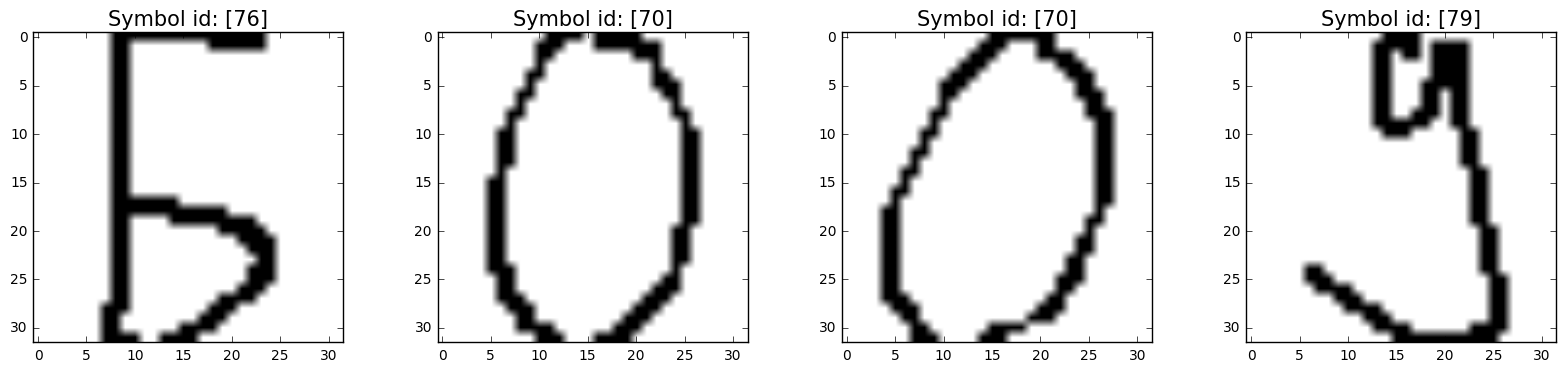

In [153]:
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    index = np.random.choice(a=np.arange(1020), size=1, replace=False)
    plt.imshow(np.reshape(data['images'][index], (32,32)), cmap=plt.cm.gray)
    plt.title('Symbol id: {}'.format(data['symbols'][index]), fontsize = 15)

plt.show()

# Split into train and test
#### Shuffle the data
#### Split into 80% train / 20% test data set

In [111]:
train_images, test_images, train_symbols, test_symbols = train_test_split(data['images'], data['symbols'], test_size=0.2, train_size=0.8) # This also shuffles by default

# Fit a logistic regression classifier

In [112]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(train_images, train_symbols) # X, y
# Let's check the model's score on the training data
log_reg.score(train_images, train_symbols)

1.0

**100%** fit rate into the training data, sounds nice

# Let's see the accuracy on the test set

In [113]:
predict = log_reg.predict(test_images) # shows the prediction result 
predict_prob = log_reg.predict_proba(test_images) # shows the prediction probability
# Generate evaluation metrics
acc_logres = metrics.accuracy_score(test_symbols, predict)
print(acc_logres)

0.877450980392


# Our model reached *87%* accuracy

# Let's build a majority class classifier

### Let's check the most common symbol first

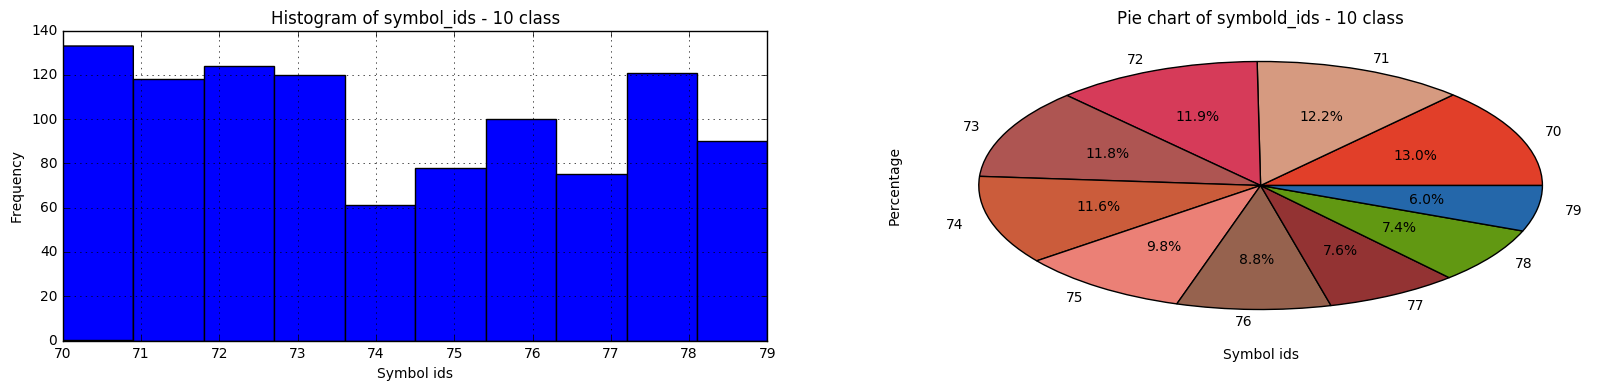

In [114]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
# Let's first plot histogram on the left
df.symbol_id.hist()
plt.title("Histogram of symbol_ids - 10 class")
plt.xlabel("Symbol ids")
plt.ylabel("Frequency")
# Let's plot this as a pie chart
plt.subplot(1, 2, 2)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E", "#933333", "#619812", "#2467AA", "#784512", "#AA5587"]
plt.pie(df.symbol_id.value_counts(normalize=True), labels=df.symbol_id.unique(), colors=colors, autopct='%1.1f%%')
plt.title("Pie chart of symbold_ids - 10 class")
plt.xlabel("Symbol ids")
plt.ylabel("Percentage")
plt.show()

# Majority class is symbol: 0 by 13%
So if we predict the result always as *0* we are going to have at most 13% accuracy, I did not even check on the test set

# Confusion matrix

In [115]:
metrics.confusion_matrix(test_symbols, predict)

array([[20,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 28,  0,  0,  2,  0,  0,  0,  0,  1],
       [ 0,  0, 27,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  9,  1,  2,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  2,  0,  2,  1,  1,  0, 19,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 17]], dtype=int64)

# Lets see the wrong guessed images

In [162]:
wrong_predictions = {'images': [], 'pred': [], 'truth': []}
for test_i, test_s, predict_s in zip(test_images, test_symbols, predict):
    if test_s != predict_s:
        wrong_predictions['images'].append(test_i)
        wrong_predictions['pred'].append(predict_s)
        wrong_predictions['truth'].append(test_s)

# Let's plot random wrong guessed images

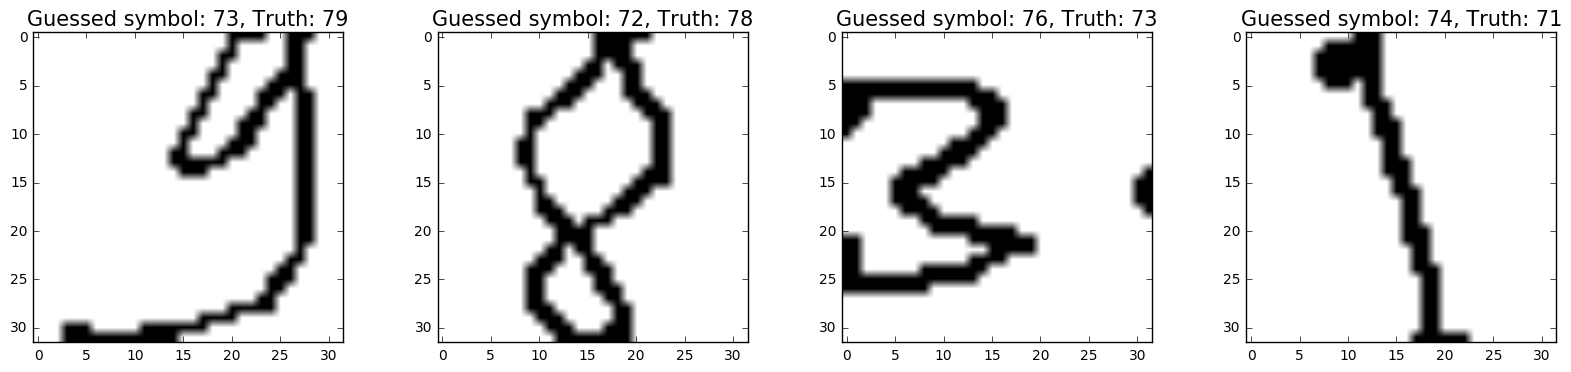

In [163]:
wrong_pred_len = len(wrong_predictions['pred'])
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    index = np.random.choice(a=np.arange(wrong_pred_len), size=1, replace=False)[0]
    plt.imshow(np.reshape(wrong_predictions['images'][index], (32,32)), cmap=plt.cm.gray)
    plt.title('Guessed symbol: {}, Truth: {}'.format(wrong_predictions['pred'][index], wrong_predictions['truth'][index]), fontsize = 15)

plt.show()